<h1>
<center>
Dataquest Guided Project 19:
Creating a Kaggle Workflow
</center>
</h1>

## Introduction

This is part of the Dataquest program.

- part of paths **Data Scientist in Python**
    - Step 8: **Advanced Topics in Data Science**
        - Course 1 :  **Kaggle Fundamentals **
            - Feature preparation, selection and engineering
            - Model selection and tuning

As this is a guided project, we are following and deepening the steps suggested by Dataquest. In this project, we will create a data science workflow.

## Use case : Kaggle Titanic competition

Kaggle has created a number of competitions designed for beginners. The most popular of these competitions, and the one we'll be looking at, is about predicting which passengers survived the sinking of the Titanic.

In this competition, we have a data set of different information about passengers onboard the Titanic, and we see if we can use that information to predict whether those people survived or not. 

Each Kaggle competition has two key data files - a training set and a testing set.
The training set contains data we can use to train our model. It has a number of feature columns which contain various descriptive data, as well as a column of the target values we are trying to predict: in this case, Survival.

The testing set contains all of the same feature columns, but is missing the target value column. Additionally, the testing set usually has fewer observations (rows) than the training set.

The files are available on the data page for the [Titanic competition on Kaggle](https://www.kaggle.com/c/titanic/data). That page also has a data dictionary, which explains the various columns that make up the data set. Below are the descriptions contained in that data dictionary:



|Header | Description|
|--------|-----------|
|** PassengerID **| A column added by Kaggle to identify each row and make submissions easier|
|** Survived ** | Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)|
|** Pclass ** | The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)|
| ** Sex ** |The passenger's sex|
| **Age ** | The passenger's age in years|
| **SibSp**| The number of siblings or spouses the passenger had aboard the Titanic|
| **Parch** | The number of parents or children the passenger had aboard the Titanic|
|**Ticket** | The passenger's ticket number |
|**Fare**| The fare the passenger paid|
|**Cabin** | The passenger's cabin number|
|**Embarked ** | The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)|

The data page on Kaggle has some additional notes about some of the columns. 

## Load the datasets 

In [54]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("train.csv")
holdout = pd.read_csv("test.csv")

Let's display the first fex lines of the test dataframe to have a better idea of the dataset.

In [4]:
holdout.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Preprocessing the Data

We have previously created a file, "functions.py" with useful pre-processing functions to prepare the features.

In [6]:
# %load functions.py
def process_missing(df):
    """Handle various missing values from the data set

    Usage
    ------

    holdout = process_missing(holdout)
    """
    df["Fare"] = df["Fare"].fillna(train["Fare"].mean())
    df["Embarked"] = df["Embarked"].fillna("S")
    return df

def process_age(df):
    """Process the Age column into pre-defined 'bins' 

    Usage
    ------

    train = process_age(train)
    """
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def process_fare(df):
    """Process the Fare column into pre-defined 'bins' 

    Usage
    ------

    train = process_fare(train)
    """
    cut_points = [-1,12,50,100,1000]
    label_names = ["0-12","12-50","50-100","100+"]
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

def process_cabin(df):
    """Process the Cabin column into pre-defined 'bins' 

    Usage
    ------

    train process_cabin(train)
    """
    df["Cabin_type"] = df["Cabin"].str[0]
    df["Cabin_type"] = df["Cabin_type"].fillna("Unknown")
    df = df.drop('Cabin',axis=1)
    return df

def process_titles(df):
    """Extract and categorize the title from the name column 

    Usage
    ------

    train = process_titles(train)
    """
    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs",
        "Ms":          "Mrs",
        "Mrs" :        "Mrs",
        "Master" :     "Master",
        "Mlle":        "Miss",
        "Miss" :       "Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Royalty",
        "Don":         "Royalty",
        "Sir" :        "Royalty",
        "Countess":    "Royalty",
        "Dona":        "Royalty",
        "Lady" :       "Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title"] = extracted_titles.map(titles)
    return df

def create_dummies(df,column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column

    Usage
    ------

    train = create_dummies(train,"Age")
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [7]:
def preprocess(df):
    df = process_missing(df)
    df = process_age(df)
    df = process_fare(df)
    df = process_titles(df)
    df = process_cabin(df)
    
    for col in ["Age_categories", "Fare_categories", 
                "Title", "Cabin_type", "Sex"]:
        df = create_dummies(df, col)
        
        return df

In [8]:
train = preprocess(train)
holdout = preprocess(holdout)

## Exploring the data 

The Kaggle workflow we are going to build will combine the following steps:![Kaggle workflow](https://s3.amazonaws.com/dq-content/188/kaggle_workflow.svg)

- ** Data Exploration**, to find patterns in the data
- ** Feature engineering**, to create new features from those patterns or through pure experimentation 
- ** Feature selection**, to select the best subset of our current set of features
- ** Model selection/tuning**, training some models with different hyperparameters to find the best performer.

We can continue to repeat this cycle as we work to optimize our predictions. At the end of any cycle we wish, we can also use our model to make predictions on the holdout set and then submit to Kaggle to get a leaderboard score.

While the first two steps of our workflow are relatively freeform, later in this project, we will create some functions that will help automate the complexity of the latter two steps so we can move faster.

For now, let's explore the data. We are going to examine the two columns that contain information about the family members each passenger had onboard : *SibSp* and *Parch*.

In [40]:
cols_to_explore = ["SibSp","Parch","Survived"]
exploration = train[cols_to_explore].copy()

In [41]:
exploration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
SibSp       891 non-null int64
Parch       891 non-null int64
Survived    891 non-null int64
dtypes: int64(3)
memory usage: 21.0 KB


In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(font_scale=2)
sns.set_palette("husl")
sns.set_style("white")

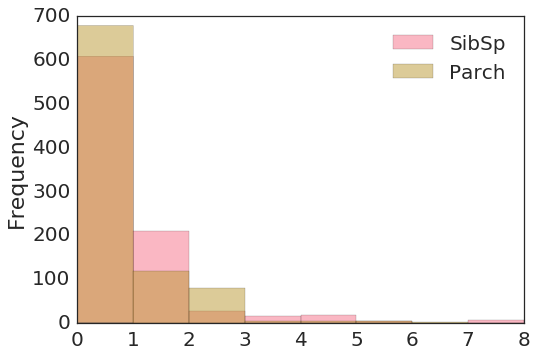

In [43]:
exploration_features = exploration.drop("Survived", axis=1)
exploration_features.plot(kind='hist', alpha= 0.5, bins=8);

Let's compute the total number of members of the family:

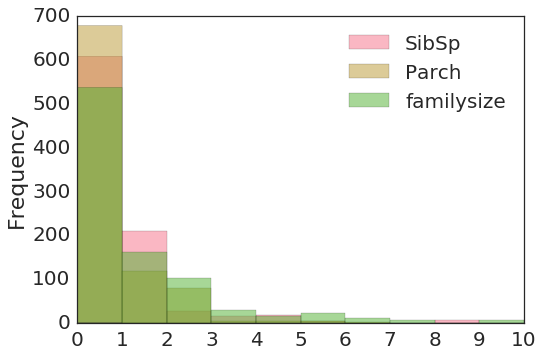

In [44]:
exploration["familysize"] = exploration[["SibSp","Parch"]].sum(axis=1)
exploration_features["familysize"] = exploration["familysize"]
exploration_features.plot(kind="hist", alpha=0.5,bins=10);
plt.xticks(range(11));

We'll use a pivot tables to look at the survival rate for different values of the columns:

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


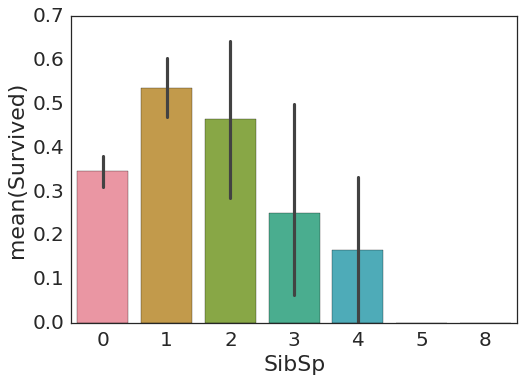

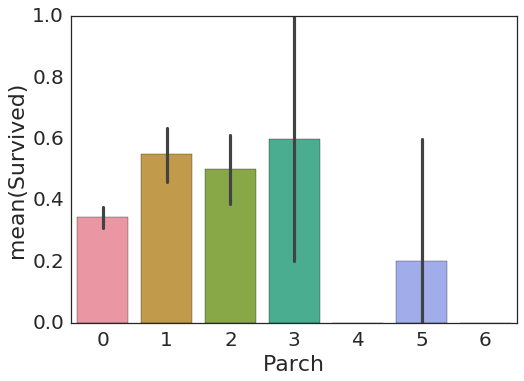

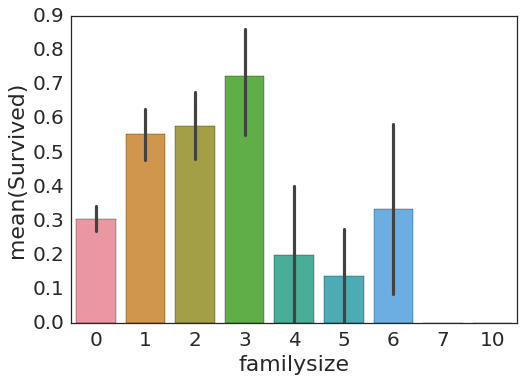

In [46]:
for col in exploration.columns.drop("Survived"):
    sns.barplot(data=exploration, y="Survived", x=col )
    plt.show()

SibSp column shows the number of siblings or spouses each passenger had on board. 
Parch column is the number of parents or children each passenger had onboard. 
We decided to add a "family size" column combining the two previous. 

The distribution of values in both columns is skewed right, with the majority of values being zero.

Looking at the survival rates of the combined family members, we can see only 30% of the passengers who had no family member onboard survived, while higher numbers of passengers with family between 1 to 3 members survived.

## Engineering new features

Given the previous result, let's create a new feature : Was the passenger alone? This will be a binary column containing the value : 
- 1 if the passenger has 0 family number onboard
- 0 if the passenter has one or more family members onboard.

In [50]:
def isalone(df):
    df["familysize"] = df[["SibSp","Parch"]].sum(axis=1)
    df["isalone"] = 0
    df.loc[(df["familysize"]==0), "isalone"] = 1
    df = df.drop("familysize", axis=1)
    return df

In [51]:
train = isalone(train)
holdout = isalone(holdout)

## Selecting the best performing features

We'll now work on feature selection. We'll use a random forest classifier with recursive feature elimination from the scikit-learn library. 

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

def select_features(df):
    # Remove any non-numeric columns or columns containing null values
    df = df.select_dtypes([np.number]).dropna(axis=1)
    all_X = df.drop(["Survived", "PassengerId"], axis=1)
    all_y = df["Survived"]
    
    clf = RandomForestClassifier(random_state=1)
    selector = RFECV(clf, cv=10)
    selector.fit(all_X, all_y)
    
    best_columns = list(all_X.columns[selector.support_])
    print("Best Columns \n"+"-"*12+"\n{}\n".format(best_columns))
    
    return best_columns

In [58]:
cols = select_features(train)

Best Columns 
------------
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Age_categories_Infant', 'Age_categories_Teenager', 'Age_categories_Young Adult', 'Age_categories_Adult', 'isalone']



/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/utils/__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


## Selecting and Tuning Different Algorithms

We will now write a function to select and tune the model. 
We will use three different algorithms and use a grid search to train using different combinations of hyperparameters to find the best performing model. 

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

def select_model(df, features):
    all_X = df[features]
    all_y = df["Survived"]
    
    '''List of dictionaries: each containing a model name, its estimator
    and a dictionary of hyperparameters'''
    
    models = [
        {
            "name": "LogisticRegression",
            "estimator": LogisticRegression(),
            "hyperparameters":
                {
                    "solver": ["newton-cg", "lbfgs", "liblinear"]
                }
        },
        {
            "name": "KNeighborsClassifier",
            "estimator": KNeighborsClassifier(),
            "hyperparameters":
                {
                    "n_neighbors": range(1,20,2),
                    "weights": ["distance", "uniform"],
                    "algorithm": ["ball_tree", "kd_tree", "brute"],
                    "p": [1,2]
                }
        },
        {
            "name": "RandomForestClassifier",
            "estimator": RandomForestClassifier(random_state=1),
            "hyperparameters":
                {
                    "n_estimators": [4, 6, 9],
                    "criterion": ["entropy", "gini"],
                    "max_depth": [2, 5, 10],
                    "max_features": ["log2", "sqrt"],
                    "min_samples_leaf": [1, 5, 8],
                    "min_samples_split": [2, 3, 5]

                }
        }
    ]
    
    for model in models:
        print(model['name'])
        print('-'*len(model['name']))

        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            cv=10)
        grid.fit(all_X,all_y)
        
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_

        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))

    return models

In [60]:
result = select_model(train,cols)

LogisticRegression
------------------
Best Score: 0.7328843995510662
Best Parameters: {'solver': 'newton-cg'}

KNeighborsClassifier
--------------------
Best Score: 0.6980920314253648
Best Parameters: {'n_neighbors': 19, 'algorithm': 'brute', 'weights': 'uniform', 'p': 1}

RandomForestClassifier
----------------------
Best Score: 0.7362514029180696
Best Parameters: {'n_estimators': 6, 'max_features': 'log2', 'max_depth': 5, 'criterion': 'entropy', 'min_samples_split': 2, 'min_samples_leaf': 8}



## Making a Submission to Kaggle

Now, we have our three scores from the three different model. At this point of the workflow, we will have a decision to make: Do we want to train our best model on the holdout set and make a Kaggle submission, or do we want to go back to engineering features?
In any case, let's create a function to prepare our submission files.

In [61]:
def save_submission_file(model, cols, filename="submission.csv"):
    holdout_data = holdout[cols]
    predictions = model.predict(holdout_data)
    
    holdout_ids = holdout["PassengerId"]
    submission_df = {"PassengerId": holdout_ids,
                    "Survived": predictions}
    submission = pd.DataFrame(submission_df)

In [62]:
best_rf_model = result[2]["best_model"]
save_submission_file(best_rf_model,cols)